In [1]:
%matplotlib notebook
import numpy as np
from scipy.stats import kde
from scipy.ndimage.filters import gaussian_filter
import pandas as pd
import os
import shutil
import subprocess
from subprocess import Popen
import datetime
import matplotlib.pyplot as plt  # plotting

from decimal import Decimal

from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
from scipy.stats import binned_statistic_2d

# make prefix for figure filenames
now = datetime.datetime.now()
date = now.strftime('%Y%m%d')
pref = date


Bad key "text.kerning_factor" on line 4 in
/Users/makamats/opt/anaconda3/envs/actincme/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# working_dir = os.curdir
actinfile1 = 'UnbranchedActinCoordinates_Integers.txt'
actinfile2 = 'BranchedActinCoordinates_Integers.txt'
membranefile = 'AllMembranesCoordinates.txt'
# c = open(membranefile,'r')
# c.readlines()

In [3]:
#  read in text file
# for all txt filex

# for a particular txt file


def read_text(file, label='fil'):
    
    import pandas as pd
    coordinatesfile = open(file, 'r')
    
    coords_df = pd.read_table(coordinatesfile, delim_whitespace=True)
#     check if there is an 'object' and 'contour' column (membrane)
    if len(coords_df.columns)==4:
        coords_df.columns=[label, 'X', 'Y', 'Z']
        coords_df=coords_df.set_index([label])
    
    elif len(coords_df.columns)==5:
        coords_df.columns=['object', label, 'X', 'Y', 'Z']
        coords_df=coords_df.set_index(['object', label])
        
    else:
        print("unexpected number of columns!")
#     make multiindex
    coordinatesfile.close()
    return coords_df

actin1 = read_text(actinfile1)
actin2 = read_text(actinfile2)
membrane = read_text(membranefile, 'contour')
# membrane
coords = actin2


/Users/makamats/opt/anaconda3/envs/actincme/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  if sys.path[0] == '':


# define which mebmrane surface to plot
## object == 1 is the CCP


In [4]:
all_membranes = membrane.reset_index()
CCP = all_membranes[all_membranes['object']==1]


In [5]:
CCP

,object,contour,X,Y,Z
0,1,1,871,851,100
1,1,1,891,863,100
2,1,1,910,876,100
3,1,1,926,880,100
4,1,1,947,869,100
5,1,1,967,856,100
6,1,1,982,843,100
7,1,1,997,825,101
8,1,1,1010,801,101
9,1,1,1016,764,101


<IPython.core.display.Javascript object>


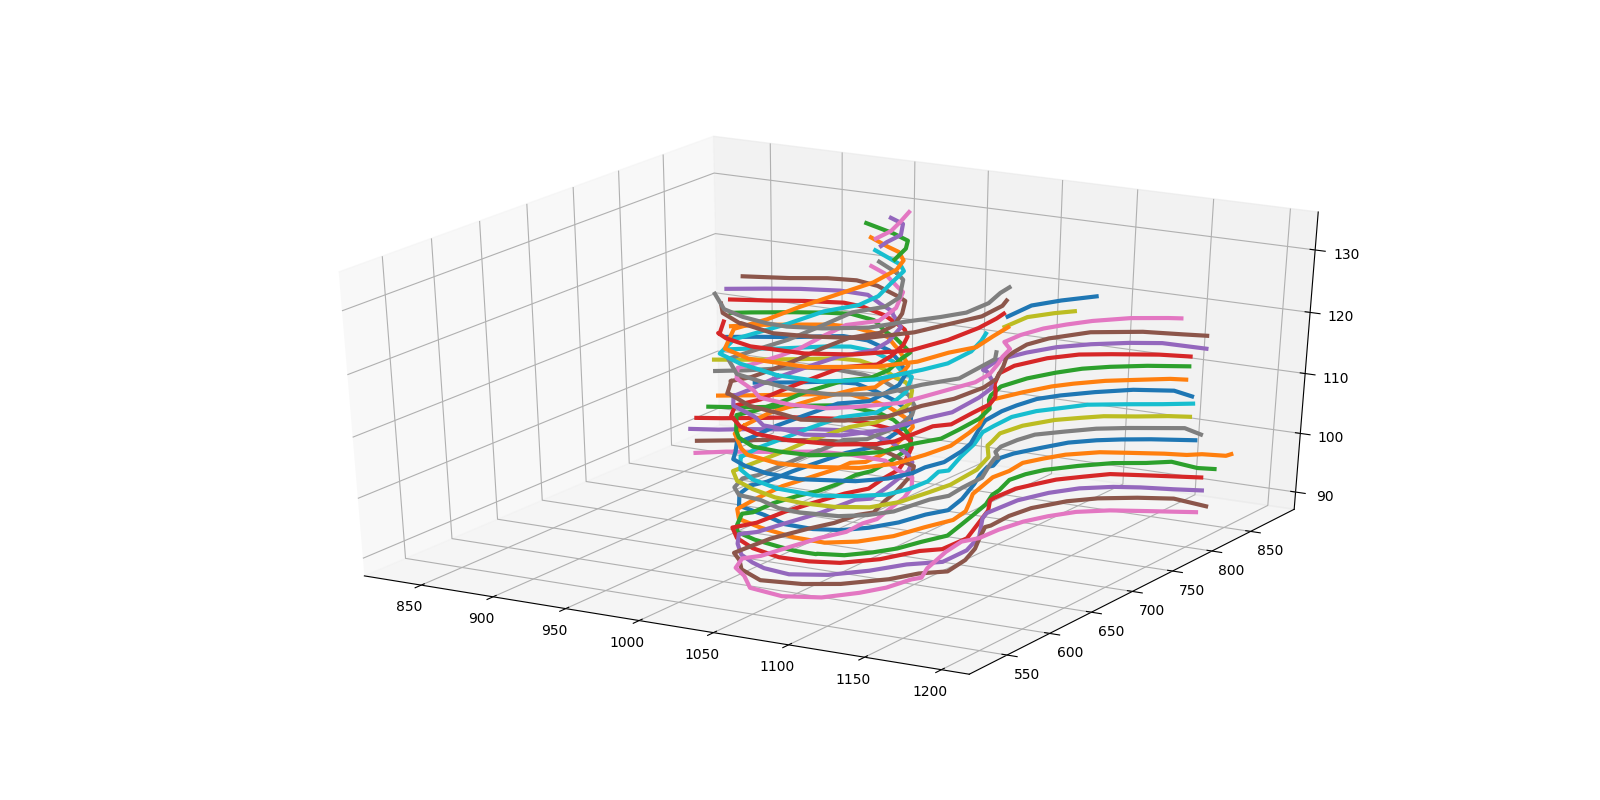

In [6]:
# plot membrane

# %matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[16,8])
ax=fig.add_subplot(111, projection='3d')

for contourr in CCP['contour'].unique():
    cur_contour = CCP[CCP['contour']==contourr]
    ax.plot(xs=cur_contour['X'], ys=cur_contour['Y'], zs=cur_contour['Z'], linewidth=3)

<IPython.core.display.Javascript object>


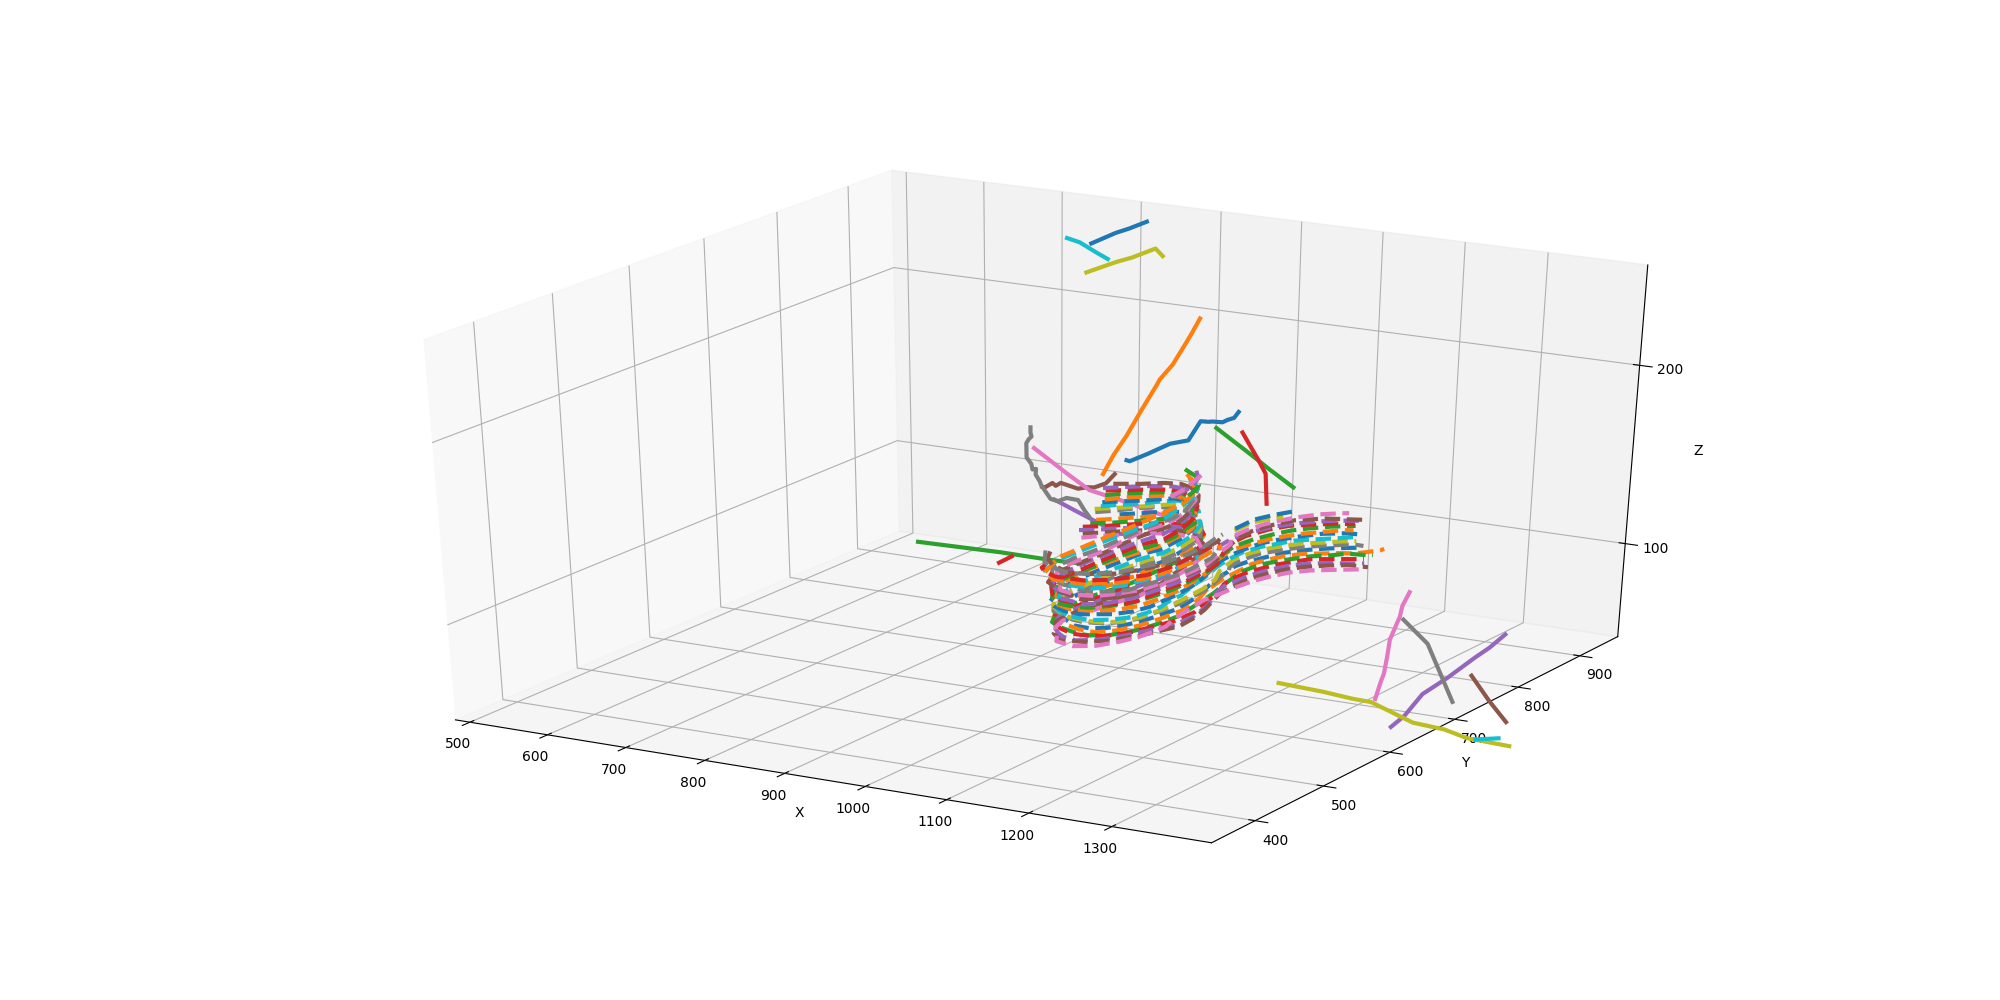

Text(0.5, 0, 'Z')

In [7]:
# plot actin and membrane
# %matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[20,10])
ax=fig.add_subplot(111, projection='3d')

# all_membranes = membrane.reset_index()
# CCP = all_membranes[all_membranes['object']==1]

for filament in coords.index.unique():
    cur_filament = coords[coords.index==filament]
    ax.plot(xs=cur_filament['X'], ys=cur_filament['Y'], zs=cur_filament['Z'], linewidth=3)

for contourr in CCP['contour'].unique():
    cur_contour = CCP[CCP['contour']==contourr]
    ax.plot(xs=cur_contour['X'], ys=cur_contour['Y'], zs=cur_contour['Z'], linewidth=3, linestyle='dashed')

    
# plot membrane
# pit = membranes[membranes['contour']==1]
# ax.plot(xs = pit['X'], ys=pit['Y'], zs = pit['Z'], linewidth=5)
# ax.autoscale(enable=True,tight=True) 

plt.xlim([500,1400])
plt.ylim([350,950])
ax.set_zlim([50,250])

ax.set_xticks(np.arange(500,1400,100))
ax.set_yticks(np.arange(400,1000,100))
ax.set_zticks([100,200])


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# calculate directionality of filaments
## ydir is arcsin(y-y0)/length

In [5]:
ydirs=[]
zdirs=[]
all_filaments = []
filament_lengths = []
for filament in coords.index.unique():
    cur_filament = coords[coords.index==filament]
    xx = cur_filament.X
    yy = cur_filament.Y
    zz = cur_filament.Z

    deltaxx = sum(np.diff(xx))
    deltayy = sum(np.diff(yy))
    deltazz = sum(np.diff(zz))

#     np.dot(zz.iloc[-1],zz.iloc[0])
    fil_length = np.sqrt(deltaxx*deltaxx+deltayy*deltayy+deltazz+deltazz)

#     define direction theta such that 1 is up , 0 is parallel and -1 is down.
# arcsin(z/L)
#   take inverse so that + faces membrane (which is toward zero I think)
#     ydir = (deltayy/fil_length)
    ydir = np.degrees(np.arcsin(deltayy/fil_length))
   
    ydirs.append(ydir)
    
    zdir = np.degrees(-(np.arcsin(deltazz/fil_length)))
#     zdir = -np.arcsin(deltazz/fil_length)

    zdirs.append(zdir)
    
    filament_lengths.append(fil_length)
    
    cur_filament['ydir']=ydir
    cur_filament['zdir']=zdir
    cur_filament['length']=fil_length
    all_filaments.append(cur_filament)
    
all_filaments_df = pd.concat(all_filaments)
all_filaments_df

/Users/makamats/opt/anaconda3/envs/actincme/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/makamats/opt/anaconda3/envs/actincme/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/makamats/opt/anaconda3/envs/actincme/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

/Users/makamats/opt/anaconda3/envs/actincme/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/makamats/opt/anaconda3/envs/actincme/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/makamats/opt/anaconda3/envs/actincme/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

/Users/makamats/opt/anaconda3/envs/actincme/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/makamats/opt/anaconda3/envs/actincme/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/makamats/opt/anaconda3/envs/actincme/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,X,Y,Z,ydir,zdir,length
fil,,,,,,
1,1239,581,224,30.403742,12.804269,302.317714
1,1220,598,217,30.403742,12.804269,302.317714
1,1191,624,210,30.403742,12.804269,302.317714
1,1172,640,205,30.403742,12.804269,302.317714
1,1138,667,199,30.403742,12.804269,302.317714
1,1123,679,196,30.403742,12.804269,302.317714
1,1103,692,193,30.403742,12.804269,302.317714
1,1082,700,180,30.403742,12.804269,302.317714
1,1049,713,174,30.403742,12.804269,302.317714


In [10]:
# plot lengths sanity check
print(np.mean(filament_lengths))
plt.hist(filament_lengths)
# plt.show()

135.77328487472997


(array([5., 6., 1., 2., 3., 0., 2., 0., 0., 1.]),
 array([  0.        ,  46.08351115,  92.1670223 , 138.25053345,
        184.3340446 , 230.41755575, 276.50106691, 322.58457806,
        368.66808921, 414.75160036, 460.83511151]),
 <a list of 10 Patch objects>)

In [11]:
# plot distributions of angles

ydirs

[30.40374197138668,
 nan,
 70.61824524576863,
 81.25383773744478,
 50.22099074692948,
 35.37142631332533,
 29.932830694516927,
 -42.44341693475175,
 81.43148581225283,
 20.54515287332902,
 86.7186542822339,
 85.153727491104,
 -49.242476438614005,
 23.989655448327557,
 24.765712841887805,
 nan,
 45.66027629855318,
 58.69126104915882,
 13.561054436493436,
 nan]

In [12]:
# hsv 75% colormap
# https://stackoverflow.com/questions/18926031/how-to-extract-a-subset-of-a-colormap-as-a-new-colormap-in-matplotlib
# %matplotlib inline
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('hsv')
new_cmap = truncate_colormap(cmap, 0, 0.75)

In [6]:
# choose a colormap

import matplotlib.colors as colors
import matplotlib.cm as cmx

# colorss = cm = plt.get_cmap('BrBG') 
colorss = cm = plt.get_cmap('seismic') 

# colorss = cm = plt.get_cmap(new_cmap)
 
# cNorm  = colors.Normalize(vmin=0, vmax=values[-1])

# set colorlim to [-1 to 1]

cNorm  = colors.Normalize(vmin=-90, vmax=90)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=colorss)
print(scalarMap.get_clim())


(-90.0, 90.0)


<IPython.core.display.Javascript object>


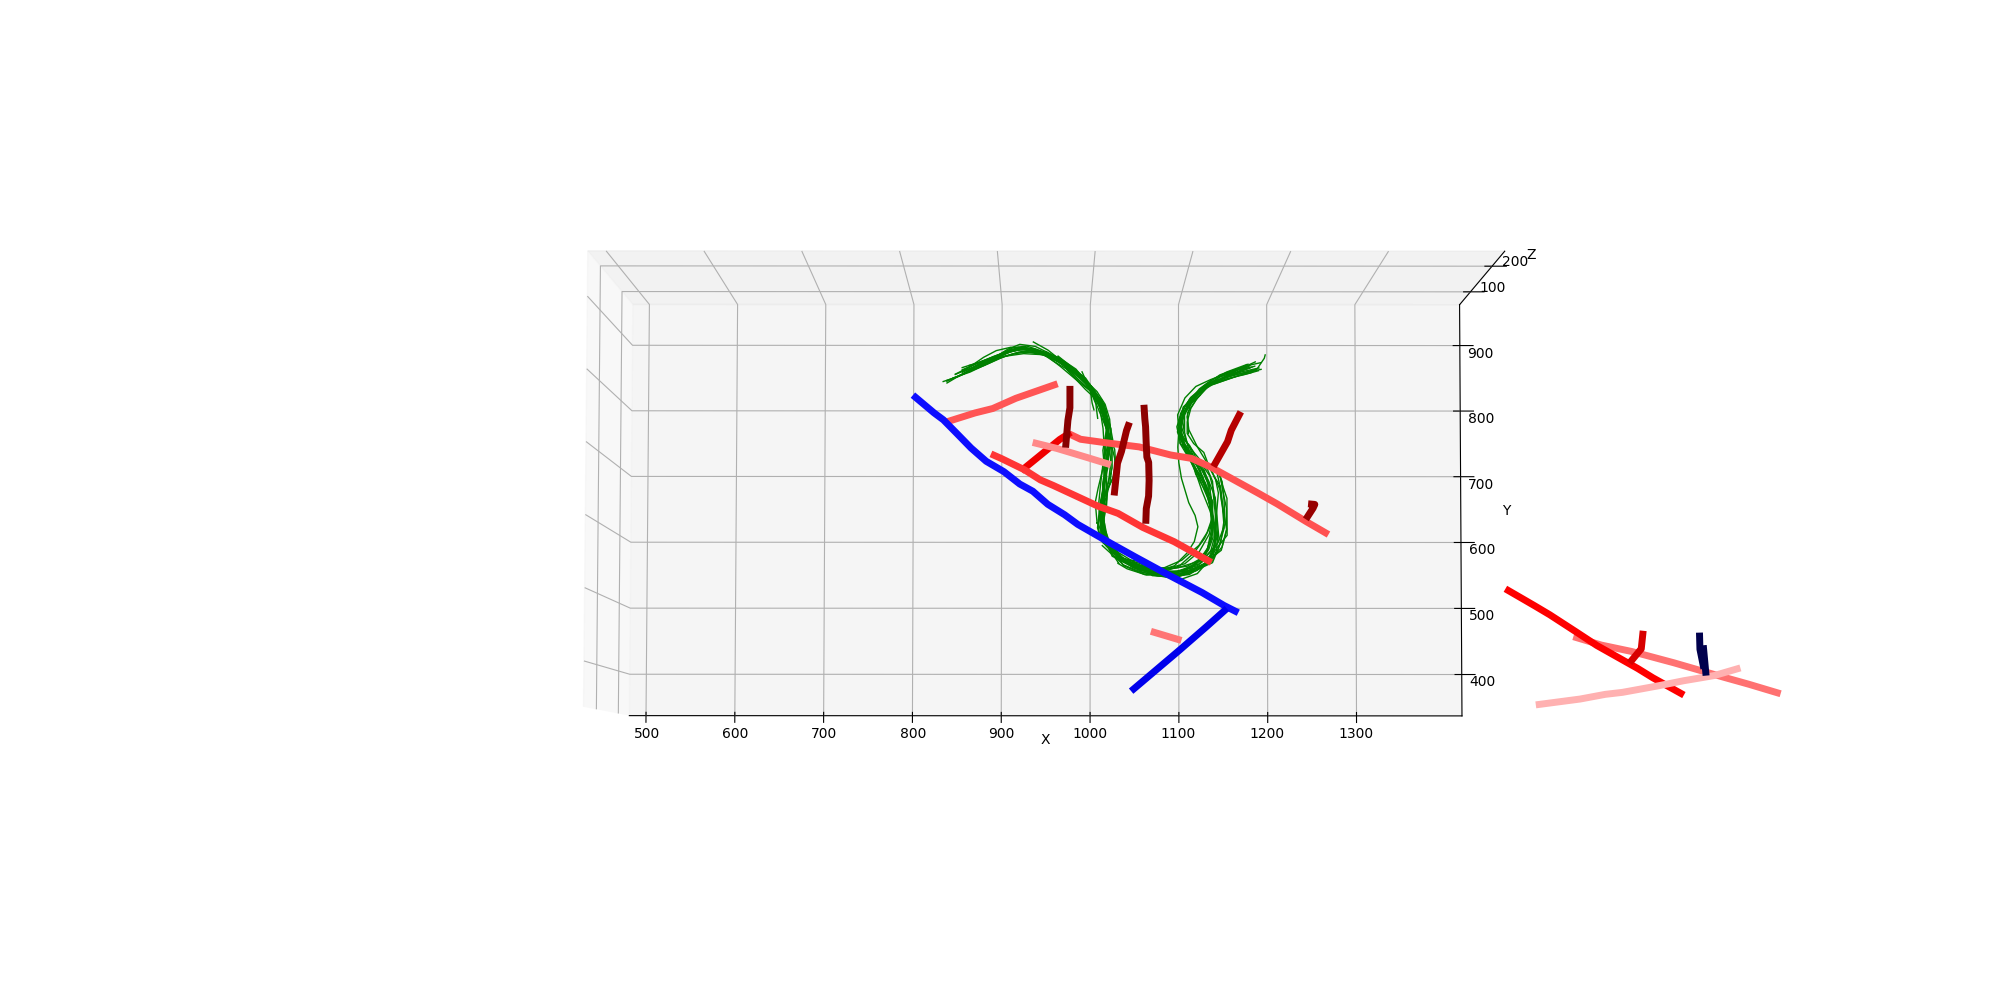

/Users/makamats/opt/anaconda3/envs/actincme/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/Users/makamats/opt/anaconda3/envs/actincme/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Text(0.5, 0, 'Z')

In [7]:
# color code angles
# %matplotlib inline
from matplotlib import cm

# plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[20,10])
ax=fig.add_subplot(111, projection='3d')


# membrane

for contourr in CCP['contour'].unique():
    cur_contour = CCP[CCP['contour']==contourr]
    ax.plot(xs=cur_contour['X'], ys=cur_contour['Y'], zs=cur_contour['Z'], color='g', linewidth=1)

for filament in all_filaments_df.index.unique():
    cur_filament = all_filaments_df[all_filaments_df.index==filament]
    colorVal = scalarMap.to_rgba(cur_filament['ydir'])
    ax.plot(xs=cur_filament['X'], ys=cur_filament['Y'], zs=cur_filament['Z'], color=colorVal[0], linewidth=5)
    
plt.xlim([500,1400])
plt.ylim([350,950])
ax.set_zlim([50,250])

ax.set_xticks(np.arange(500,1400,100))
ax.set_yticks(np.arange(400,1000,100))
ax.set_zticks([100,200])


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [14]:
# save CCP membrane coordinates
CCP=CCP.reset_index().set_index(['object','contour'])

CCP.to_pickle('CCP_membrane_coordinates.pkl')
CCP

index     X    Y    Z
object contour                       
1      1            0   871  851  100
       1            1   891  863  100
       1            2   910  876  100
       1            3   926  880  100
       1            4   947  869  100
       1            5   967  856  100
       1            6   982  843  100
       1            7   997  825  101
       1            8  1010  801  101
       1            9  1016  764  101
       1           10  1018  741  101
       1           11  1018  710  102
       1           12  1014  678  102
       1           13  1014  678  102
       1           14  1012  659  102
       1           15  1011  632  102
       1           16  1014  609  103
       1           17  1018  590  103
       1           18  1031  568  103
       1           19  1054  558  103
       1           20  1074  547  103
       1           21  1093  546  103
       1           22  1108  552  103
       1           23  1119  564  103
       1           24  1128  582  103
       1           25  1133  604  103
       1           26  1133  630  102
       1           27  1128  655  102
       1           28  1118  687  102
       1           29  1111  706  102
...               ...   ...  ...  ...
       25         792  1002  778  131
       26         793  1010  587  133
       26         794  1022  569  133
       26         795  1043  553  133
       26         796  1043  554  133
       26         797  1070  543  133
       26         798  1092  547  133
       26         799  1119  558  133
       26         800  1136  583  133
       26         801  1144  611  133
       26         802  1143  646  132
       26         803  1141  673  132
       26         804  1137  685  132
       27         805   989  833  133
       27         806   997  809  133
       27         807  1004  786  133
       27         808  1006  765  133
       28         809  1011  579  135
       28         810  1034  551  135
       28         811  1052  541  135
       28         812  1071  535  135
       28         813  1084  534  135
       28         814  1103  540  135
       28         815  1124  554  135
       28         816  1135  576  135
       28         817  1146  594  135
       28         818  1146  623  134
       28         819  1146  648  134
       28         820  1140  672  134
       28         821  1138  686  134

[822 rows x 4 columns]

In [8]:
# import 3D meshing of membrane made by "symmetrecized plotting.ipynb"
import pickle as pkl
cur_mesh = pkl.load(open('rotate_obj.pkl','rb'))
cur_mesh

<IPython.core.display.Javascript object>


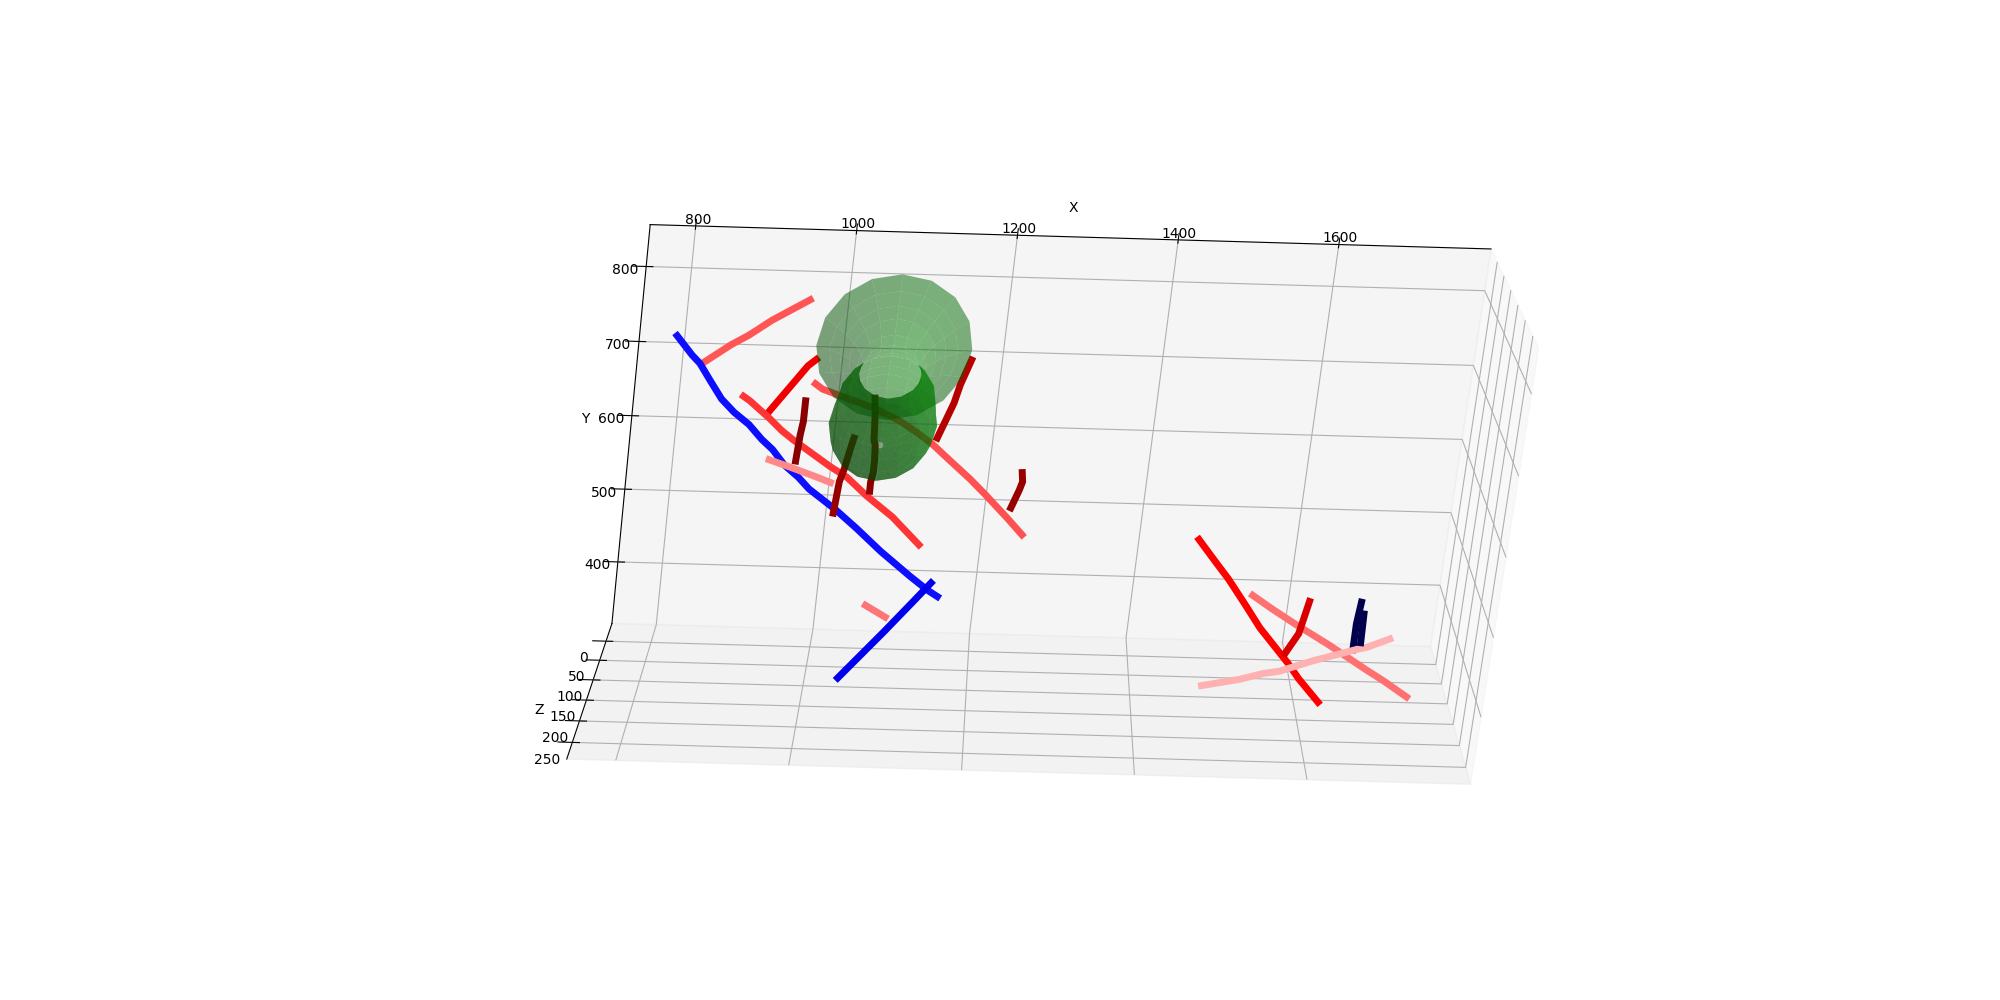

/Users/makamats/opt/anaconda3/envs/actincme/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/Users/makamats/opt/anaconda3/envs/actincme/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Text(0.5, 0, 'Z')

In [9]:
# plot

fig = plt.figure(figsize=[20,10])
ax=fig.add_subplot(111, projection='3d')

# membrane
ax.plot_surface(cur_mesh.x3d,cur_mesh.y3d, cur_mesh.z3d, color='g', alpha=0.5)

# filaments

for filament in all_filaments_df.index.unique():
    cur_filament = all_filaments_df[all_filaments_df.index==filament]
    colorVal = scalarMap.to_rgba(cur_filament['ydir'])
    ax.plot(xs=cur_filament['X'], ys=cur_filament['Y'], zs=cur_filament['Z'], color=colorVal[0], linewidth=5)
    
# plt.xlim([500,1400])
# plt.ylim([350,950])
# ax.set_zlim([50,250])

# ax.set_xticks(np.arange(500,1400,100))
# ax.set_yticks(np.arange(400,1000,100))
# ax.set_zticks([100,200])


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


# with actin

In [17]:
# # arrowheads??
# # https://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot
# import numpy as np
# from numpy import *
# from matplotlib import pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.patches import FancyArrowPatch
# from mpl_toolkits.mplot3d import proj3d

# class Arrow3D(FancyArrowPatch):
#     def __init__(self, xs, ys, zs, *args, **kwargs):
#         FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
#         self._verts3d = xs, ys, zs

#     def draw(self, renderer):
#         xs3d, ys3d, zs3d = self._verts3d
#         xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
#         self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
#         FancyArrowPatch.draw(self, renderer)


In [18]:
# fig = plt.figure(figsize=(15,15))
# ax = fig.add_subplot(111, projection='3d')

# a = Arrow3D(xs=cur_filament['X'], ys=cur_filament['Y'], zs=cur_filament['Z'], mutation_scale=20, 
#                 lw=3, arrowstyle="-|>", color="r")
# ax.add_artist(a)

<IPython.core.display.Javascript object>


## color code each segment